In [356]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing and visualising the data

In [358]:
dataset = pd.read_csv('Training.csv') # Loading the dataset that we want to study
dataset.head() # Display the first five rows of the dataset in order to analyse the information

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


#### After having a look at the information displayed at the dataset, we can observe that the majority of the columns are related to different symptoms of diseases that the patients show (0 for NO, 1 for YES). Taking into account these symptoms, the column "prognosis" shows the prediction of the disease suffered by the patient. The objective of this exercise is to train a machine learning algorithm to be capable of predicting the disease suffered by a patient when the symptoms are fed to the algorithm.

#### Moreover, we can observe that the last column of the dataset does not provide any meaningful information, so we can safely drop it:

In [360]:
dataset = dataset.dropna(axis = 1) # Using dropna since the last column is not a "real" column but a given name to show that there's a blank space with NaN values
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


#### Next, it will be a good idea to count how many diseases are listed in the dataframe in order to know if the training set is balanced.

In [362]:
diseases = dataset['prognosis'].value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Disease': diseases.index,
                         'Counts': diseases.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

                                    Disease  Counts
0                          Fungal infection     120
1                               Hepatitis C     120
2                               Hepatitis E     120
3                       Alcoholic hepatitis     120
4                              Tuberculosis     120
5                               Common Cold     120
6                                 Pneumonia     120
7              Dimorphic hemmorhoids(piles)     120
8                              Heart attack     120
9                            Varicose veins     120
10                           Hypothyroidism     120
11                          Hyperthyroidism     120
12                             Hypoglycemia     120
13                          Osteoarthristis     120
14                                Arthritis     120
15  (vertigo) Paroymsal  Positional Vertigo     120
16                                     Acne     120
17                  Urinary tract infection     120
18          

Text(0.5, 1.0, 'Number of different diseases')

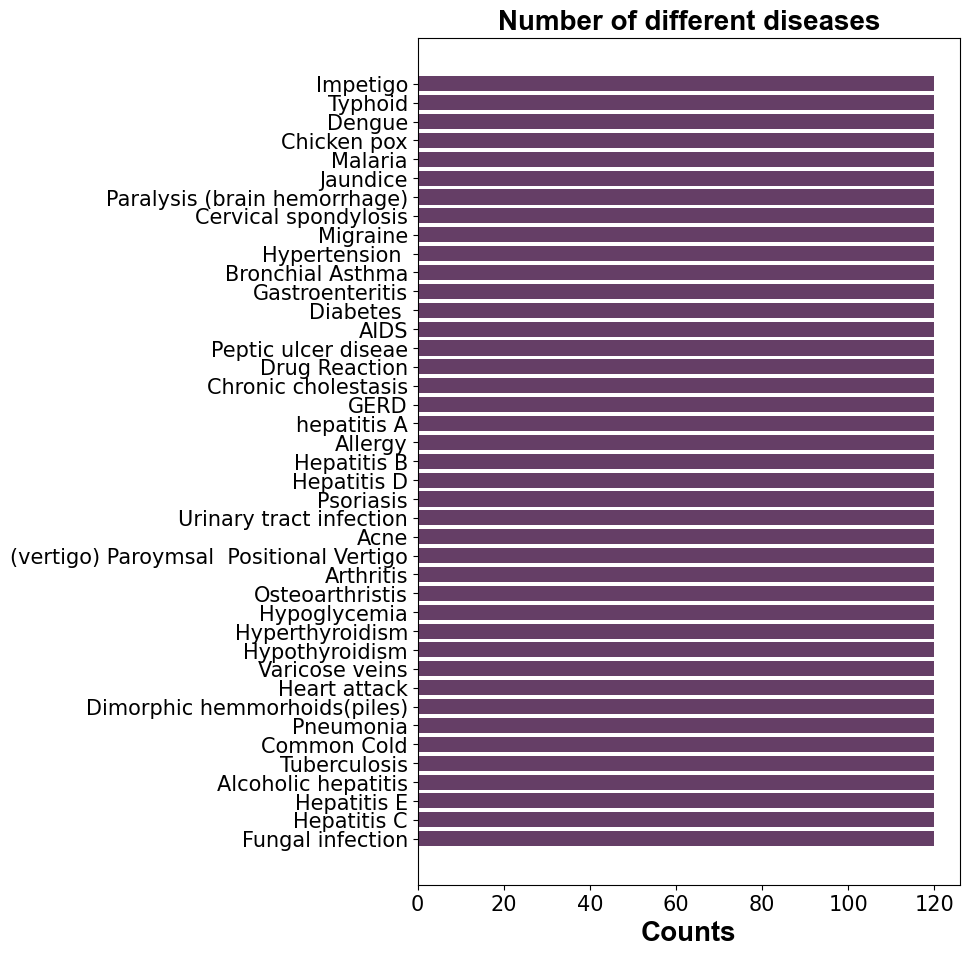

In [363]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(7, 11))
plt.barh(dis_data['Disease'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.title('Number of different diseases', fontsize = 20, fontweight='bold', **csfont)

#### From both the DataFrame and the bar plot we can observe that there are a total of 40 different diseases with 120 samples for each one of them. We can conclude that the data is balanced and can be used for training an algorithm.

## Data preprocessing

#### Now it is time to review all the data and make it suitable for training our algorithm. All the columns except for the 'prognosis' one are composes of 0 or 1 information, so it is suitable for training. For the last column, it will be necessary to encode the 40 different values of the last column into numeric data. For this purpose we will use LabelEncoder from the Scikit Learn library:

In [365]:
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder from the preprocessing library
encoder = LabelEncoder() # Generating the LabelEncoder object
dataset['prognosis'] = encoder.fit_transform(dataset['prognosis']) # Applying the transformation to the 'prognosis' column
dataset['prognosis'].head(50) # Printing the 50 first values to check if the transformation was successful

0     15
1     15
2     15
3     15
4     15
5     15
6     15
7     15
8     15
9     15
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20    16
21    16
22    16
23    16
24    16
25    16
26    16
27    16
28    16
29    16
30     9
31     9
32     9
33     9
34     9
35     9
36     9
37     9
38     9
39     9
40    14
41    14
42    14
43    14
44    14
45    14
46    14
47    14
48    14
49    14
Name: prognosis, dtype: int32

## Splitting the data intro training and testing sets

####  Now that all the columns are correctly encoded, the dataset is ready to feed the algorithm. But before that, we need to divide the dataset into the training and testing sets. The first one will train the algorithm and the second one will give us the accuracy of the predictions, since we already know the expected result.

#### We will use one of the standard splits, where 80% of the data will be used for training, and the other 20% for testing.

In [367]:
from sklearn.model_selection import train_test_split # Importing the train/test splitting from Scikit Learn
X = dataset.iloc[:, :-1].values # Choosing all the columns except for the last one as X values (the symptoms)
y = dataset.iloc[:, -1].values # Choosing the last column as the y values (the disease prediction)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19) # Splitting the dataset 

## Model selection

#### In this case, since we want to CLASSIFY the different diseases, we can use different options such as Support Vector, Random Forest or Gaussian Naive Bayes classifiers. Instead of blindly choosing one of them, we can compare their efficiency (or accuracy) performing with the training data. But this time we will be using a K-Fold Cross-Validation algorithm to evaluate the possible models.

In [369]:
from sklearn.model_selection import cross_val_score # Importing Cross Validation Score
from sklearn.metrics import accuracy_score, confusion_matrix # Importing the accuracy score that will be used in the function, 
                                                            # besides from the confusion matrix that will be used later

# First we define a function that gives us the accuracy score of the different models in order to compare them
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X)) 

# Importing the possible models
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes Classifier

# Creating a dictionary and initialising the classifiers
models = {"SVC":SVC(), 
          "Random Forest":RandomForestClassifier(random_state = 19), 
          "Gaussian NB":GaussianNB()}

for model_name in models:   # We loop for every item in the models dictionary
    model = models[model_name]  # Select the name of the model in each iteratino
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring) # Apply cross validation score using the X, y data for each model
                                                                                      # the data will be split into 10 folds (cv = 10)
                                                                                      # Use all available CPU cores to speed up the process (n_jobs = -1)
                                                                                      # Use the defined fuction for scoring (cv_scoring)
    print("=="*20)
    print(model_name)
    print(f"Scores: {scores}") # Print the scores obtained for each of the 10 splits of the cross validation
    print(f"Mean Score: {np.mean(scores)}") # Print the mean of the 10 splits

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


#### From this result, we can observe that the model performance for each one is very good, and the three of them will serve their purpose perfectly. So basically we could be using one of them, but in order to make a robust and reliable model we can combine the three of them into one single model.

## Combining the three models
### Train/test of the SVC model

Accuracy Score (SVM model): 100.0 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

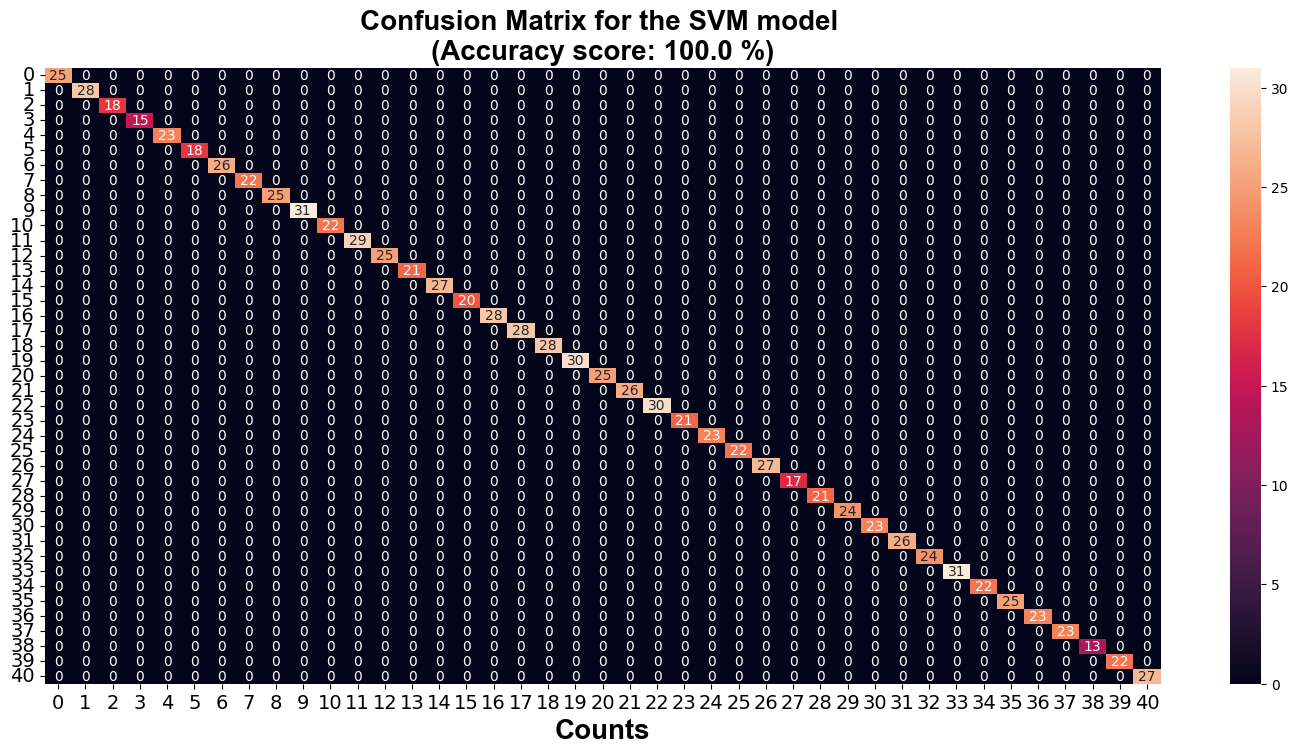

In [371]:
svm_model = SVC()  # Generating the object
svm_model.fit(X_train, y_train)  # Training the model
svm_preds = svm_model.predict(X_test)  # Obtaining the predictions

print("Accuracy Score (SVM model):", accuracy_score(y_test, svm_preds)*100, "%") # Print the accuracy score for the predictions
cm_SVM = confusion_matrix(y_test, svm_preds)  # Generate the confusion matrix

plt.figure(figsize=(18,8))
sns.heatmap(cm_SVM, annot = True)  # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.title(f'Confusion Matrix for the SVM model \n(Accuracy score: {accuracy_score(y_test, svm_preds)*100} %)', fontsize = 20, fontweight='bold', **csfont)
plt.tight_layout

### Train/test of the Random Forest model


Accuracy Score (Random Forest model): 100.0 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

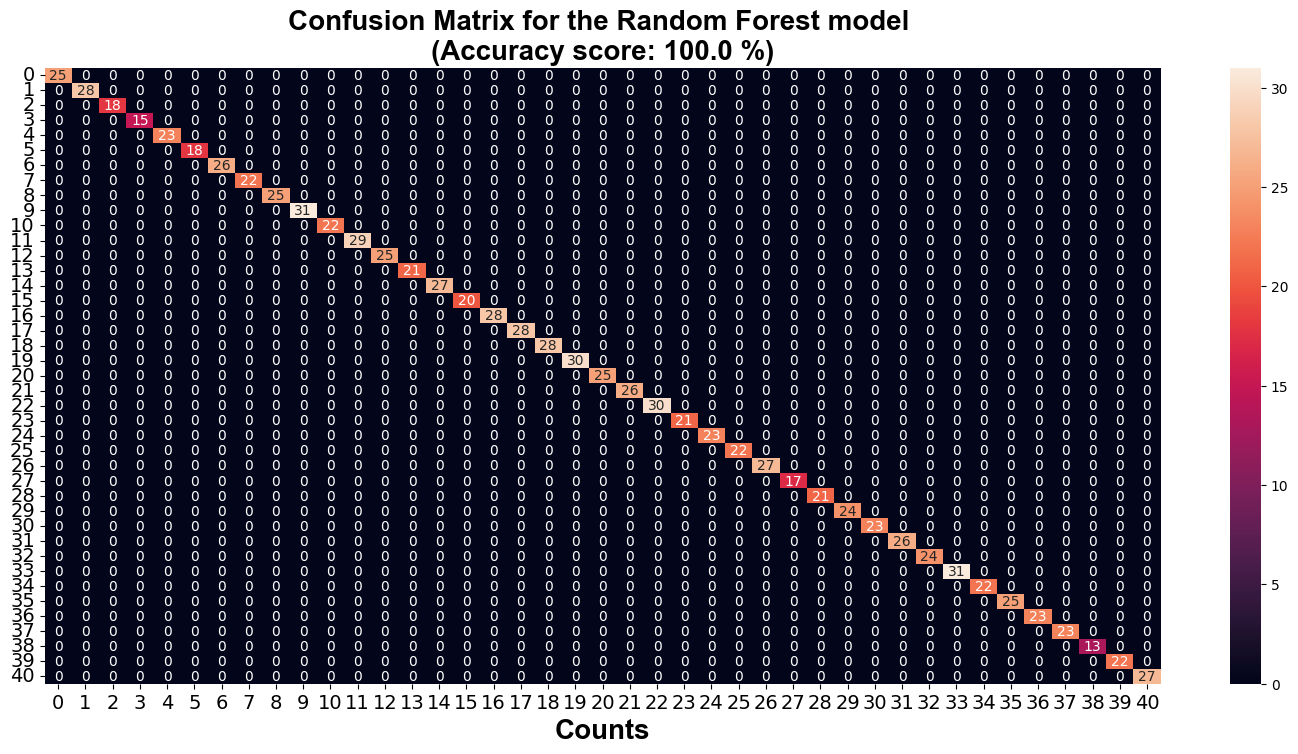

In [373]:
rf_model = RandomForestClassifier(random_state = 19)  # Generating the object
rf_model.fit(X_train, y_train)  # Training the model
rf_preds = rf_model.predict(X_test)  # Obtaining the predictions

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, rf_preds)*100, "%") # Print the accuracy score for the predictions

cm_rf = confusion_matrix(y_test, rf_preds)  # Generate the confusion matrix
plt.figure(figsize=(18,8))
sns.heatmap(cm_rf, annot = True)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, rf_preds)*100} %)', fontsize = 20, fontweight='bold', **csfont)
plt.tight_layout

### Train/test of the Gaussian Naive Bayes model

Accuracy Score (Random Forest model): 100.0 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

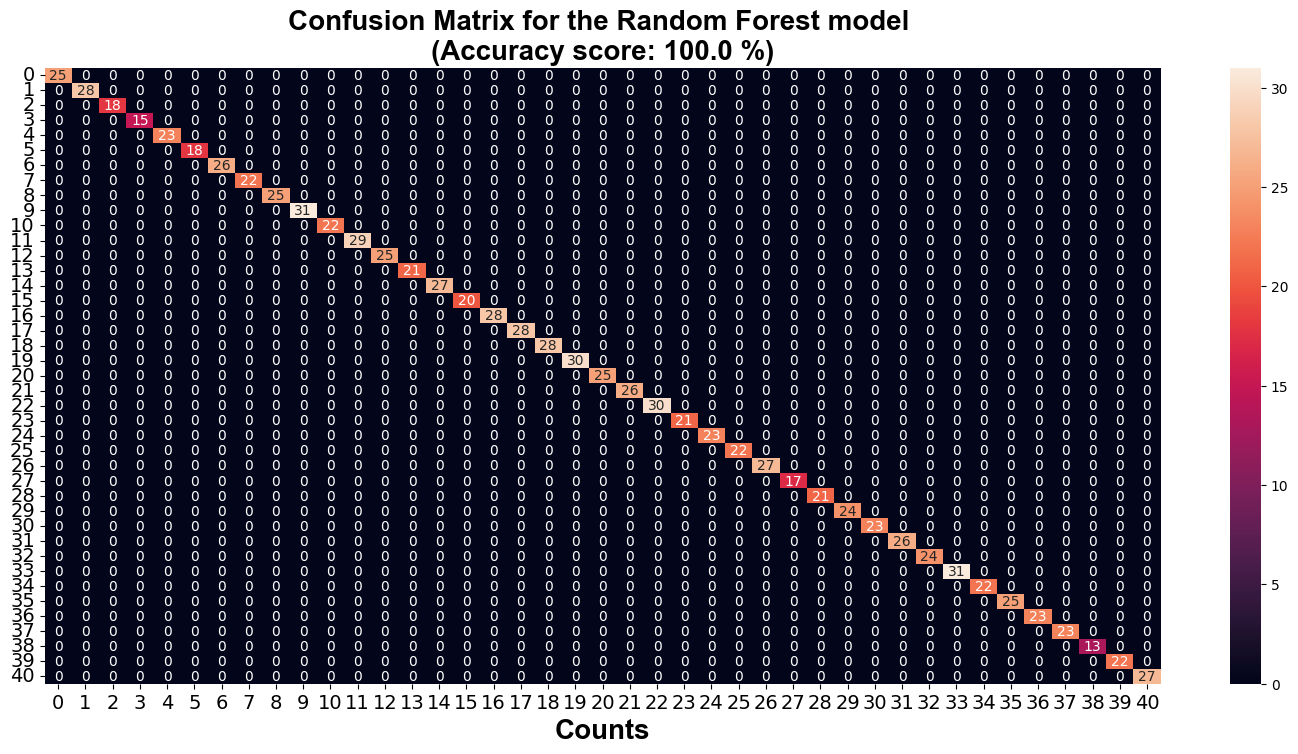

In [375]:
nb_model = GaussianNB()  # Generating the object
nb_model.fit(X_train, y_train)  # Training the model
nb_preds = nb_model.predict(X_test)  # Obtaining the predictions

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, nb_preds)*100, "%") # Print the accuracy score for the predictions

cm_nb = confusion_matrix(y_test, rf_preds)  # Generate the confusion matrix
plt.figure(figsize=(18,8))
sns.heatmap(cm_nb, annot = True)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, nb_preds)*100} %)', fontsize = 20, fontweight='bold', **csfont)
plt.tight_layout

#### Now that we have observed the performance of the three models, we can train them whit the whole dataset and use the testing csv file to obtain some predictions

## Using the whole dataset to train the models

In [377]:
final_SVM_model = SVC()
final_SVM_model.fit(X,y)  # Using the whole dataset instead of X_train and y_train

final_rf_model = RandomForestClassifier(random_state = 19)
final_rf_model.fit(X,y)  # Using the whole dataset instead of X_train and y_train

final_nb_model = GaussianNB()
final_nb_model.fit(X,y)  # Using the whole dataset instead of X_train and y_train

GaussianNB()

#### Now we can import the testing dataset. Remember to drop the NaN column and apply the encoder to the 'prognosis' column.

In [383]:
test_dataset = pd.read_csv('Testing.csv')
test_dataset = test_dataset.dropna(axis = 1) # Drop NaN values
test_dataset['prognosis'] = encoder.transform(test_dataset['prognosis']) # Applying the transformation to the 'prognosis' column

test_X = test_dataset.iloc[:, :-1].values  # Splitting into X and y values
test_y = test_dataset.iloc[:,-1].values

#### Making the predictions using the test data

In [393]:
final_SVM_preds = final_SVM_model.predict(test_X)
final_rf_preds = final_rf_model.predict(test_X)
final_nb_preds = final_nb_model.predict(test_X)

#### We now can combine the three predictions. For that, we will be using the mode, which is the most frequently occurring value between the three predictions.

In [399]:
!pip install scipy  # We install the scipy librarie
from scipy import stats  #And we import stats

Accuracy Score of the combined models: 100.0 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

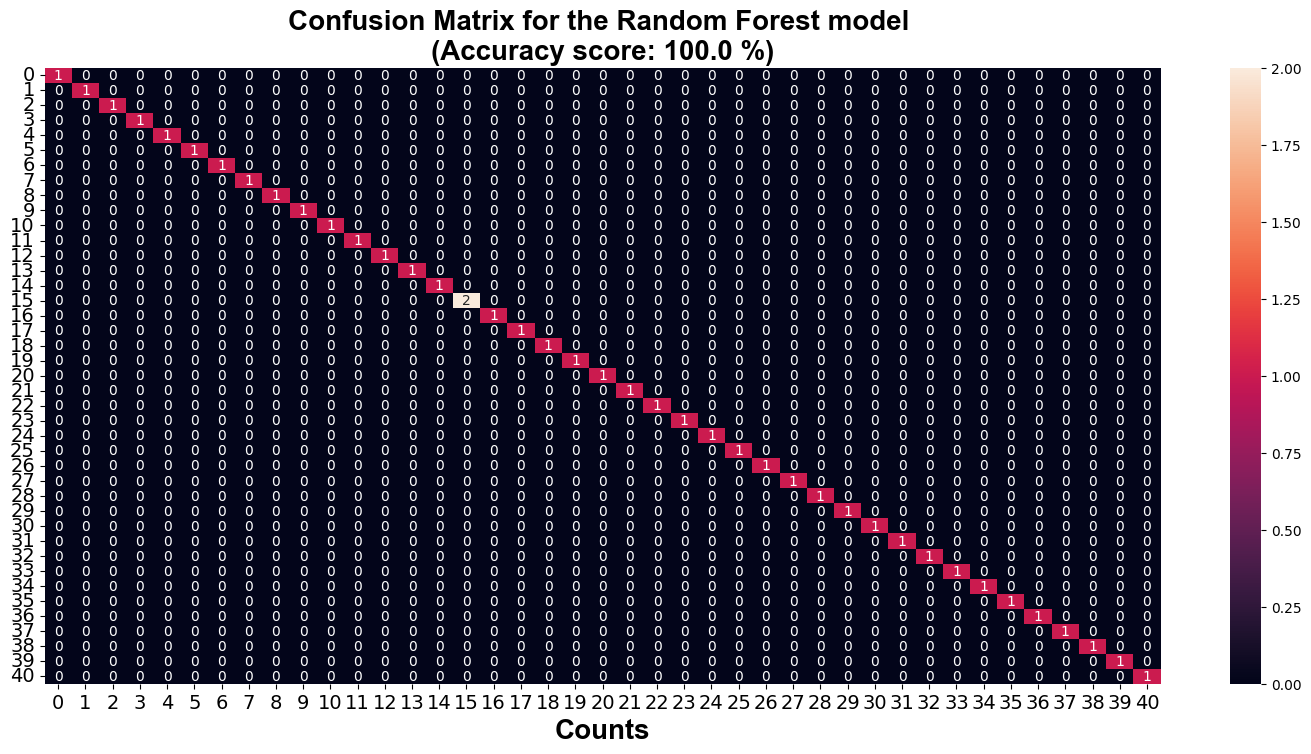

In [403]:
final_preds = [stats.mode([i, j, k])[0] for i, j, k in zip(final_SVM_preds, final_rf_preds, final_nb_preds)] # Calculating the mode of the three models

print('Accuracy Score of the combined models:', accuracy_score(test_y, final_preds)*100, '%') # Print the accuracy score of the combined models
final_cm = confusion_matrix(test_y, final_preds) # Generate a confusion matrix
plt.figure(figsize=(18,8))
sns.heatmap(final_cm, annot = True)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(test_y, final_preds)*100} %)', fontsize = 20, fontweight='bold', **csfont)
plt.tight_layout

## Creating a disease predictor

#### Now that we have a trained model and we know that is pretty accurate, we can feed it some symptoms and predict if we have any disease

In [462]:
# Lista de síntomas
possible_symptoms = dataset.columns.tolist()
possible_symptoms.pop()


# Crear una lista vacía para guardar los valores
symptoms = []

# Iterar sobre cada síntoma y pedir un valor
for i in possible_symptoms:
    while True:  # Validación para asegurarnos de que el usuario introduzca un número válido
        try:
            # Pedir el valor asociado al síntoma
            value = int(input(f"Enter 1 (Yes) or 0 (No) '{i}': "))
            if value in [0, 1]:  # Validar que el valor sea únicamente 0 o 1
                symptoms.append(value)  # Guardar el valor en la lista
                break  # Salir del bucle si la entrada es válida
            else:
                print("Please, enter 0 for No or 1 for Yes.") 
        except ValueError:
            print("Please, enter a valid number (0 o 1).")

# Mostrar los resultados
print("\nEntered values:")
for i, sintoma in enumerate(possible_symptoms):
    print(f"{sintoma}: {'Yes' if symptoms[i] == 1 else 'No'}")

Enter 1 (Yes) or 0 (No) 'itching':  0
Enter 1 (Yes) or 0 (No) 'skin_rash':  0
Enter 1 (Yes) or 0 (No) 'nodal_skin_eruptions':  0
Enter 1 (Yes) or 0 (No) 'continuous_sneezing':  0
Enter 1 (Yes) or 0 (No) 'shivering':  0
Enter 1 (Yes) or 0 (No) 'chills':  0
Enter 1 (Yes) or 0 (No) 'joint_pain':  1
Enter 1 (Yes) or 0 (No) 'stomach_pain':  1
Enter 1 (Yes) or 0 (No) 'acidity':  1
Enter 1 (Yes) or 0 (No) 'ulcers_on_tongue':  0
Enter 1 (Yes) or 0 (No) 'muscle_wasting':  1
Enter 1 (Yes) or 0 (No) 'vomiting':  0
Enter 1 (Yes) or 0 (No) 'burning_micturition':  0
Enter 1 (Yes) or 0 (No) 'spotting_ urination':  0
Enter 1 (Yes) or 0 (No) 'fatigue':  0
Enter 1 (Yes) or 0 (No) 'weight_gain':  1
Enter 1 (Yes) or 0 (No) 'anxiety':  1
Enter 1 (Yes) or 0 (No) 'cold_hands_and_feets':  1
Enter 1 (Yes) or 0 (No) 'mood_swings':  1
Enter 1 (Yes) or 0 (No) 'weight_loss':  0
Enter 1 (Yes) or 0 (No) 'restlessness':  1
Enter 1 (Yes) or 0 (No) 'lethargy':  1
Enter 1 (Yes) or 0 (No) 'patches_in_throat':  0
Enter 1 

Please, enter a valid number (0 o 1).


Enter 1 (Yes) or 0 (No) 'blood_in_sputum':  0
Enter 1 (Yes) or 0 (No) 'prominent_veins_on_calf':  0
Enter 1 (Yes) or 0 (No) 'palpitations':  1
Enter 1 (Yes) or 0 (No) 'painful_walking':  0
Enter 1 (Yes) or 0 (No) 'pus_filled_pimples':  0
Enter 1 (Yes) or 0 (No) 'blackheads':  0
Enter 1 (Yes) or 0 (No) 'scurring':  0
Enter 1 (Yes) or 0 (No) 'skin_peeling':  0
Enter 1 (Yes) or 0 (No) 'silver_like_dusting':  0
Enter 1 (Yes) or 0 (No) 'small_dents_in_nails':  0
Enter 1 (Yes) or 0 (No) 'inflammatory_nails':  0
Enter 1 (Yes) or 0 (No) 'blister':  0
Enter 1 (Yes) or 0 (No) 'red_sore_around_nose':  0
Enter 1 (Yes) or 0 (No) 'yellow_crust_ooze':  0



Entered values:
itching: No
skin_rash: No
nodal_skin_eruptions: No
continuous_sneezing: No
shivering: No
chills: No
joint_pain: Yes
stomach_pain: Yes
acidity: Yes
ulcers_on_tongue: No
muscle_wasting: Yes
vomiting: No
burning_micturition: No
spotting_ urination: No
fatigue: No
weight_gain: Yes
anxiety: Yes
cold_hands_and_feets: Yes
mood_swings: Yes
weight_loss: No
restlessness: Yes
lethargy: Yes
patches_in_throat: No
irregular_sugar_level: No
cough: Yes
high_fever: No
sunken_eyes: No
breathlessness: No
sweating: No
dehydration: No
indigestion: Yes
headache: Yes
yellowish_skin: No
dark_urine: No
nausea: No
loss_of_appetite: No
pain_behind_the_eyes: Yes
back_pain: No
constipation: Yes
abdominal_pain: No
diarrhoea: No
mild_fever: No
yellow_urine: No
yellowing_of_eyes: No
acute_liver_failure: No
fluid_overload: No
swelling_of_stomach: Yes
swelled_lymph_nodes: No
malaise: Yes
blurred_and_distorted_vision: No
phlegm: No
throat_irritation: Yes
redness_of_eyes: Yes
sinus_pressure: Yes
runny_no

In [464]:
real_SVM_preds = final_SVM_model.predict(np.array(symptoms).reshape(1, -1))
real_rf_preds = final_rf_model.predict(np.array(symptoms).reshape(1, -1))
real_nb_preds = final_nb_model.predict(np.array(symptoms).reshape(1, -1))

In [466]:
print('SVM prediction:', encoder.inverse_transform(real_SVM_preds))
print('Random Forest prediction:', encoder.inverse_transform(real_rf_preds))
print('Naive Bayes prediction:', encoder.inverse_transform(real_nb_preds))

SVM prediction: ['Migraine']
Random Forest prediction: ['Common Cold']
Naive Bayes prediction: ['Migraine']
